# **Reporte de Calidad de Datos Taylor Swift Dataset**

El conjunto de datos corresponde a la artista Taylor Swift, el cual fue extraído de la API de Spotify, proporciona información acerca de sus álbumes y pistas que se encuentran disponibles en la plataforma Spotify. A continuación una breve descripción de los campos pertenecientes al dataset:

* disc_number: Número de disco al que partenece la pista.
* duration_ms: Duración de la pista en milisegundos (ms).
* explicit: Clasificación de contenido explicito en la pista.
* track_number: Número de la pista en el álbum.
* track_popularity: Puntuación de popularidad de la pista. Rango de medición de 0 a 100.
* track_id: Identificador de la pista.
* track_name: Nombre de la pista.
* audio_features.danceability: Cuan bailable es la pista en función de elementos musicales que incluye el tempo, ritmo, fuerza del ritmo y regularidad general. Rango de medición de 0 a 1.
* audio_features.energy: Cuan energetica es la canción medido en función del rango dinámico, volumen percibido, timbre y velocidad. Rango de medición de 0 a 1.
* audio_features.key: Tonalidad de la pista. Rango de medición de 0 a 10.
* audio_features.loudness: Volumen percibido de la pista en decibelios. Rango de medición de -60 a 0.
* audio_features.mode:
* audio_features.speechiness: Presencia de palabras cantadas en la pista. Rango de medición de 0 a 1.
* audio_features.acousticness: Cuan acústica es la pista. Rango de medición de 0 a 1.
* audio_features.instrumentalness: Presencia de elementos vocales en la pista.
* audio_features.liveness: Clasificación de pista grabada en vivo o no. Rango de medición de 0 a 1.
* audio_features.valence: Positividad percibida en la pista. Rango de medición de 0 a 1.
* audio_features.tempo: Velocidad a la que se ejecuta la pista, medido en segundos.
* audio_features.id: Identificador de las carácteristicas de audio de la pista.
* audio_features.time_signature: Compás de la pista.
* artist_id: Identificador del artista en la plataforma.
* artist_name: Nombre del artista.
* artist_popularity: Puntuación de popularidad en la plataforma.
* album_id: Identificador del álbum.
* album_name: Nombre del álbum.
* album_release_date: Fecha de lanzamiento de la pista.
* album_total_tracks: Número total de las pistas en el álbum.

## **Hallazgos**

En esta sección serán expuestos los descubrimientos derivados de la exploración de la información suministrada, acompañado del código utilizado y los resultados obtenidos.

### 1. Valores vacíos


In [2]:
import pandas as pd

df = pd.read_csv('../primer_entregable/dataset.csv')

conteo_null = df.isnull().sum()

valores_nulos = conteo_null[conteo_null > 0]

valores_nulos = pd.DataFrame({'Columna': valores_nulos.index, 'Cantidad': valores_nulos.values})

La tabla presenta la cantidad de valores nulos que se encuentran en cada columna del dataset. Cada fila de la tabla representa una columna, y la columna **Cantidad** indica cuántos valores nulos están presentes en esa columna.

In [3]:
from IPython.core.display import HTML

html_str = valores_nulos.to_html(index=False)

display(HTML(html_str))

total_nulos = valores_nulos['Cantidad'].sum()

print(f"\nCantidad total de valores nulos: {total_nulos}")

Columna,Cantidad
track_id,8
track_name,7
audio_features.danceability,2
audio_features.energy,2
audio_features.key,1
audio_features.loudness,2
audio_features.speechiness,1
audio_features.acousticness,1
audio_features.liveness,1
audio_features.tempo,1



Cantidad total de valores nulos: 89


## 2. Valores duplicados

In [4]:
registros_duplicados = df[df.duplicated(subset=['audio_features.id'], keep=False)]

identificadores_repetidos = registros_duplicados['audio_features.id'].unique()

La presencia de duplicados sugiere posibles problemas durante la recolección de datos, puesto que cada identificador debería ser único para garantizar la integridad de la información en el conjunto de datos.

A continuación se presentan los identificadores duplicados de las pistas:

In [5]:
print(', '.join(map(str, identificadores_repetidos)))

total_duplicados = len(identificadores_repetidos)

print(f'\nCantidad total de registros duplicados: {total_duplicados}')

3xYJScVfxByb61dYHTwiby, 43rA71bccXFGD4C8GOpIlN, 1BxfuPKGuaTgP7aM0Bbdwr, 1dGr1c8CrMLDpV6mPbImSI, 3RauEVgRgj1IuWdJ9fDs70, 3pHkh7d0lzM2AldUtz2x37, 2YWtcWi3a83pdEg3Gif4Pd, 214nt20w5wOxJnY462klLw, 4y5bvROuBDPr5fuwXbIBZR, 12M5uqx0ZuwkpLp5rJim1a, 2dgFqt3w9xIQRjhPtwNk3D, 1LLXZFeAHK9R4xUramtUKw, 4AYtqFyFbX0Xkc2wtcygTr, 5hQSXkFgbxjZo9uCwd11so, 6RRNNciQGZEXnqk8SQ9yv5, 1SymEzIT3H8UZfibCs3TYi, 2Rk4JlNc2TPmZe2af99d45, 1SmiQ65iSAbPto6gPFlBYm, 1fzAuUVbzlhZ1lJAx9PtY6, 1ZY1PqizIl78geGM4xWlEA

Cantidad total de registros duplicados: 20


##3. Integridad de Datos

Verificación de la consistencia de los datos en las columnas. Para columnas númericas, identifica valores fuera del rango mínimo y máximo, por otra parte, para columnas de texto, destaca aquellos datos que no cumplan con los críterios.

In [6]:
rangos = {
    'duration_ms': (0, float('inf')),
    'track_popularity': (0, 100),
    'audio_features.danceability': (0, 1),
    'audio_features.energy': (0, 1),
    'audio_features.key': (0, 10),
    'audio_features.loudness': (-60, 0),
    'audio_features.acousticness': (0, 1),
    'audio_features.speechiness': (0, 1),
    'audio_features.liveness': (0, 1),
    'audio_features.valence': (0, 1),
    'audio_features.time_signature': (0, 5),
    'album_total_tracks': (8, 46)
}

criterios_texto = {'explicit': ['True', 'False']}

valores_fuera_de_rango = {}

for columna, rango in rangos.items():
    if columna == 'album_total_tracks':
        valores_no_numericos = df[~df[columna].astype(str).str.isnumeric()][columna].tolist()
        valores_concatenados_no_numericos = ', '.join(set(map(str, valores_no_numericos)))

        if valores_concatenados_no_numericos:
            valores_fuera_de_rango[columna] = valores_concatenados_no_numericos
    else:
        valores_fuera = df[(df[columna] < rango[0]) | (df[columna] > rango[1])][columna].tolist()
        valores_concatenados = ', '.join(set(map(str, valores_fuera)))

        if valores_concatenados:
            valores_fuera_de_rango[columna] = valores_concatenados

for columna, criterios in criterios_texto.items():
    valores_fuera_texto = df[~df[columna].isin(criterios)][columna].tolist()

    valores_concatenados = ', '.join(set(map(str, valores_fuera_texto)))

    if valores_concatenados:
        valores_fuera_de_rango[columna] = valores_concatenados

df_valores_fuera_rango = pd.DataFrame(list(valores_fuera_de_rango.items()), columns=['Columna', 'Valores Fuera de Rango'])

html_str = df_valores_fuera_rango.to_html(index=False)

display(HTML(html_str))

total_fuera_rango = sum(len(valores) for valores in valores_fuera_de_rango.values())

print(f'\nCantidad total de valores fuera de rango: {total_fuera_rango}')

Columna,Valores Fuera de Rango
duration_ms,"-223093, -107133"
track_popularity,"-75, -85, 152, -69, -70, -71, -92"
audio_features.key,11.0
audio_features.acousticness,"-0.00354, 2.0, -0.000537, 5.0, 1.5"
album_total_tracks,Thirteen
explicit,"Si, No"



Cantidad total de valores fuera de rango: 101


## 4. Malas prácticas

In [7]:
df_caracteres = pd.DataFrame(columns=['Caracter Especial', 'Columnas'])

for caracter in ['_', '.']:
    columnas_con_caracter = [columna for columna in df.columns if caracter in columna]
    df_caracteres = pd.concat([df_caracteres, pd.DataFrame({'Caracter Especial': caracter, 'Columnas': [columnas_con_caracter]})], ignore_index=True)


El uso de caracteres especiales en los títulos de columnas en una base de datos puede afectar la legibilidad y disminuir el puntaje de la base de datos por prácticas de código innadecuadas. Es esencial mantener la consistencia y evitar caracteres que puedan dificultar la importación de la data y interpretación del código en SQL.

In [8]:
html_str = df_caracteres.to_html(index=False)

display(HTML(html_str))

total_malas_practicas = len(set(df_caracteres['Columnas'].explode()))
print(f'\nCantidad total columnas con carácteres especiales: {total_malas_practicas}')

Caracter Especial,Columnas
_,"[disc_number, duration_ms, track_number, track_popularity, track_id, track_name, audio_features.danceability, audio_features.energy, audio_features.key, audio_features.loudness, audio_features.mode, audio_features.speechiness, audio_features.acousticness, audio_features.instrumentalness, audio_features.liveness, audio_features.valence, audio_features.tempo, audio_features.id, audio_features.time_signature, artist_id, artist_name, artist_popularity, album_id, album_name, album_release_date, album_total_tracks]"
.,"[audio_features.danceability, audio_features.energy, audio_features.key, audio_features.loudness, audio_features.mode, audio_features.speechiness, audio_features.acousticness, audio_features.instrumentalness, audio_features.liveness, audio_features.valence, audio_features.tempo, audio_features.id, audio_features.time_signature]"



Cantidad total columnas con carácteres especiales: 26


## 5. Uso ineficiente del almacenamiento

In [9]:
columna1 = 'track_id'
columna2 = 'audio_features.id'

filas_iguales = df[(~df[columna1].isnull()) & (~df[columna2].isnull())]

mostrar_columnas = [columna1, columna2]
ejemplos_filas = filas_iguales[mostrar_columnas].head(10)

df_ejemplos = pd.DataFrame(ejemplos_filas, columns=mostrar_columnas)

Los datos de las columnas **track_id y audio_features.id** presentan una concordancia del 98%, indicando que la mayoría de la información es idéntica. El 2% restante corresponde a valores nulos en la columna **track_id**. Este grado de similitud sugiere una redundancia en el almacenamiento de la información, ya que ambos identificadores contienen en gran medida datos duplicados. A continuación se representan algunos ejemplos de ello:

In [10]:
html_str = df_ejemplos.to_html(index=False)

display(HTML(html_str))

total_filas_iguales = len(filas_iguales)

print(f'\nCantidad total de valores iguales en las columnas {columna1} y {columna2}: {total_filas_iguales} de {len(df)}')

track_id,audio_features.id
4WUepByoeqcedHoYhSNHRt,4WUepByoeqcedHoYhSNHRt
0108kcWLnn2HlH2kedi1gn,0108kcWLnn2HlH2kedi1gn
3Vpk1hfMAQme8VJ0SNRSkd,3Vpk1hfMAQme8VJ0SNRSkd
1OcSfkeCg9hRC2sFKB4IMJ,1OcSfkeCg9hRC2sFKB4IMJ
2k0ZEeAqzvYMcx9Qt5aClQ,2k0ZEeAqzvYMcx9Qt5aClQ
50yNTF0Od55qnHLxYsA5Pw,50yNTF0Od55qnHLxYsA5Pw
3FxJDucHWdw6caWTKO5b23,3FxJDucHWdw6caWTKO5b23
7oZONwFiFIErZcXAtTu7FY,7oZONwFiFIErZcXAtTu7FY
27exgla7YBw9DUNNcTIpjy,27exgla7YBw9DUNNcTIpjy
733OhaXQIHY7BKtY3vnSkn,733OhaXQIHY7BKtY3vnSkn



Cantidad total de valores iguales en las columnas track_id y audio_features.id: 531 de 539


#**Impacto**

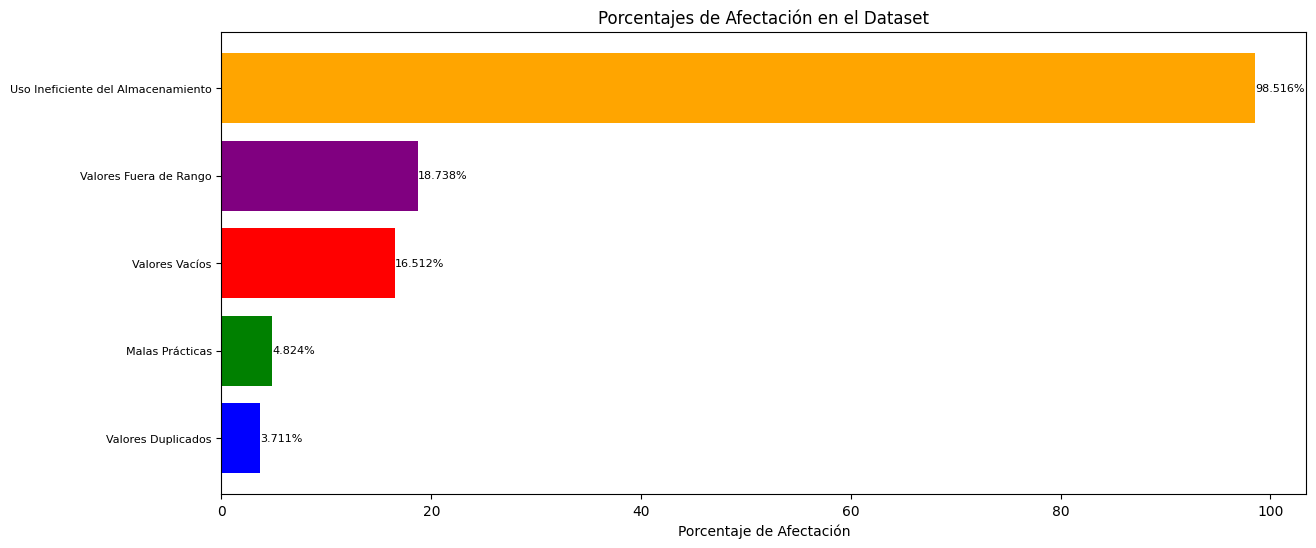

In [11]:
import matplotlib.pyplot as plt

porcentaje_valores_vacios = round((total_nulos / len(df)) * 100, 3)
porcentaje_valores_duplicados = round((total_duplicados / len(df)) * 100, 3)
porcentaje_valores_fuera_rango = round((total_fuera_rango / len(df)) * 100, 3)
porcentaje_valores_malas_practicas = round((total_malas_practicas / len(df)) * 100, 3)
porcentaje_valores_almacenamiento = round((total_filas_iguales / len(df)) * 100, 3)

porcentajes_agrupados = [porcentaje_valores_vacios, porcentaje_valores_duplicados, porcentaje_valores_fuera_rango, porcentaje_valores_malas_practicas, porcentaje_valores_almacenamiento]

columnas = ['Valores Vacíos', 'Valores Duplicados', 'Valores Fuera de Rango', 'Malas Prácticas', 'Uso Ineficiente del Almacenamiento']

porcentajes_ordenados, nombres_ordenados = zip(*sorted(zip(porcentajes_agrupados, columnas), reverse=False))

fig, ax = plt.subplots(figsize=(14, 6))
bars = ax.barh(nombres_ordenados, porcentajes_ordenados, color=['blue', 'green', 'red', 'purple', 'orange'])
ax.set_xlabel('Porcentaje de Afectación')
ax.set_title('Porcentajes de Afectación en el Dataset')

ax.tick_params(axis='y', labelsize=8)

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width()}%',
             va='center', ha='left', fontsize=8, color='black')

plt.show()

#**Conclusiones**

In [12]:
print(f"\nUn {porcentaje_valores_vacios}% de celdas vacías ha sido identificado en diversas columnas, afectando la integridad de los análisis al limitar la disponibilidad de datos completos.")
print(f"\nUn {porcentaje_valores_duplicados}% de registros duplicados ha sido detectado, sugiriendo posibles irregularidades en la recolección de datos y comprometiendo la unicidad de identificadores de pistas.")
print(f"\nUn {porcentaje_valores_fuera_rango}% de registros presenta valores atípicos que están fuera de los rangos definidos, lo que podría impactar la validez de los análisis al introducir datos inesperados.")
print(f"\nUn {porcentaje_valores_malas_practicas}% de las columnas utiliza caracteres especiales en sus nombres, afectando la legibilidad del código SQL y disminuyendo la calidad de la base de datos.")
print(f"\nUn {porcentaje_valores_almacenamiento}% de similitud entre las columnas 'track_id' y 'audio_features.id' indica un uso ineficiente del almacenamiento, redundancia en la información y posibles oportunidades de optimización.")


porcentaje_general_impacto = round(sum(porcentajes_agrupados) / len(porcentajes_agrupados), 3)
print(f'\nPorcentaje general de impacto: {porcentaje_general_impacto} %')


Un 16.512% de celdas vacías ha sido identificado en diversas columnas, afectando la integridad de los análisis al limitar la disponibilidad de datos completos.

Un 3.711% de registros duplicados ha sido detectado, sugiriendo posibles irregularidades en la recolección de datos y comprometiendo la unicidad de identificadores de pistas.

Un 18.738% de registros presenta valores atípicos que están fuera de los rangos definidos, lo que podría impactar la validez de los análisis al introducir datos inesperados.

Un 4.824% de las columnas utiliza caracteres especiales en sus nombres, afectando la legibilidad del código SQL y disminuyendo la calidad de la base de datos.

Un 98.516% de similitud entre las columnas 'track_id' y 'audio_features.id' indica un uso ineficiente del almacenamiento, redundancia en la información y posibles oportunidades de optimización.

Porcentaje general de impacto: 28.46 %
